# Reconnaître les chiffres manuscrits 

In [1]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

# Ensemble de données de chiffres 

L'ensemble de données sur les chiffres se compose d'images de chiffres de 8 x 8 pixels. L' imagesattribut de l'ensemble de données stocke des tableaux 8x8 de valeurs en niveaux de gris pour chaque image. Nous utiliserons ces tableaux pour visualiser les 4 premières images. L' targetattribut de l'ensemble de données stocke le chiffre que chaque image représente et celui-ci est inclus dans le titre des 4 tracés ci-dessous.

Remarque : si nous travaillions à partir de fichiers image (par exemple, des fichiers « png »), nous les chargerions en utilisant matplotlib.pyplot.imread.

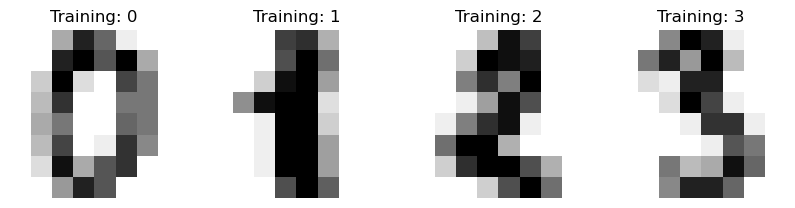

In [2]:
# chargement de dataset 
digits = datasets.load_digits()

# utilisation de la version oriente objet de plt

#chargement dans l'axe en affichant les 4 premier chiffre
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

for ax, image, label in zip(axes, digits.images, digits.target):
    #Supprime les axes de l'image
    ax.set_axis_off()
    # l'image à afficher 
    #cmap : la carte de couleurs "gray_r" qui utilise une palette de couleurs en niveaux de gris avec une luminosité inversée
    #interpolation : l'interpolation "nearest neighbor" qui préserve les pixels originaux de l'image.
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
    


# Classification 

Pour appliquer un classificateur sur ces données, nous devons aplatir les images, en transformant chaque tableau 2D de valeurs en niveaux de gris de forme en forme . Par la suite, l'ensemble des données aura la forme , où correspond au nombre d'images et au nombre total de pixels dans chaque image.(8, 8)(64,)(n_samples, n_features)n_samplesn_features

Nous pouvons ensuite diviser les données en sous-ensembles d'entraînement et de test et installer un classificateur vectoriel de support sur les échantillons d'entraînement. Le classificateur ajusté peut ensuite être utilisé pour prédire la valeur du chiffre pour les échantillons du sous-ensemble de test.

In [3]:
# Calculer le nombre d'échantillons dans le jeu de données Digits
n_samples = len(digits.images)

# Aplatir chaque image en une seule dimension
data = digits.images.reshape((n_samples, -1))

# Créer un classificateur de machine à vecteurs de support (SVM) avec un noyau RBF
clf = svm.SVC(gamma=0.001)

# Diviser les données en ensembles d'entraînement et de test (50% chacun)
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Entraîner le modèle SVM sur l'ensemble d'entraînement
clf.fit(X_train, y_train)

# Prédire les valeurs des chiffres sur l'ensemble de test
predicted = clf.predict(X_test)

Ci-dessous, nous visualisons les 4 premiers échantillons de test et montrons leur valeur numérique prévue dans le titre.

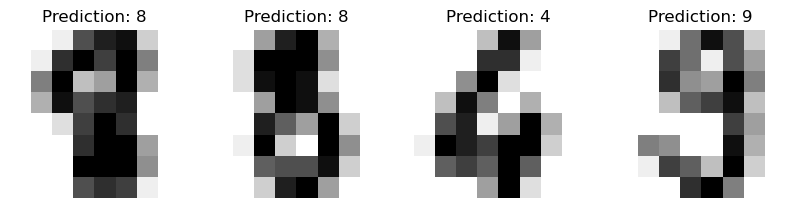

In [4]:
# Création de la figure avec quatre sous-graphiques 
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

# Boucle pour afficher les images avec les prédictions
# La boucle for parcourt chaque sous-graphique (ax), 
# chaque image de l'ensemble de test (image), 
# et chaque prédiction associée (prediction)
for ax, image, prediction in zip(axes, X_test, predicted):
    # désactive les axes
    ax.set_axis_off()
    # reformate l'image à ses dimensions d'origine (8x8).
    image = image.reshape(8, 8)
    #  affiche l'image en niveaux de gris avec une palette  
    # de couleurs inversée (gray_r), utilisant une 
    # interpolation "nearest neighbor" 
    # pour préserver les pixels originaux de l'image.
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    # ajoute un titre au sous-graphique indiquant 
    # la prédiction associée à l'image.
    ax.set_title(f"Prediction: {prediction}")

classification_report crée un rapport texte montrant les principales mesures de classification.

In [5]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Nous pouvons également tracer une matrice de confusion des valeurs numériques vraies et des valeurs numériques prédites.

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


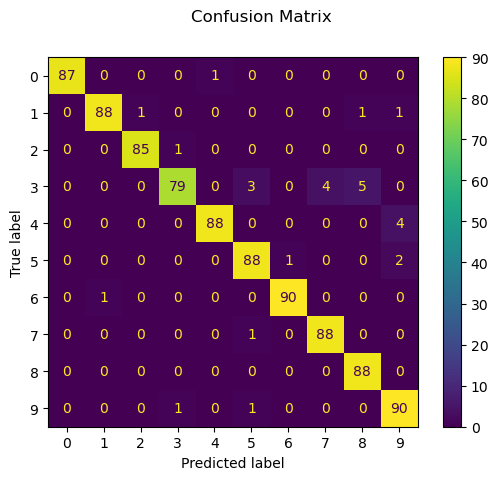

In [6]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

Si les résultats de l'évaluation d'un classificateur sont stockés sous la forme d'une matrice de confusion et non en termes de y_trueet y_pred, on peut toujours construire un classification_report comme suit :

In [7]:
# Les listes des vraies valeurs (ground truth) et des prédictions
y_true = []
y_pred = []

# La matrice de confusion
cm = disp.confusion_matrix

# Pour chaque cellule dans la matrice de confusion, ajouter les vraies valeurs
# et les prédictions correspondantes aux listes
for vraie_val in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [vraie_val] * cm[vraie_val][pred]
        y_pred += [pred] * cm[vraie_val][pred]

# Afficher le rapport de classification reconstruit à partir de la matrice de confusion
print(
    "Rapport de classification reconstruit à partir de la matrice de confusion :\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)


Rapport de classification reconstruit à partir de la matrice de confusion :
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




In [8]:
print("x",X_train.shape)
print("y",y_train.shape)
print("y",y_train.ravel().shape)
print("x",X_train.ravel().shape)

x (898, 64)
y (898,)
y (898,)
x (57472,)


In [9]:
import numpy as np

predict = clf.predict(X_train)
correlation = np.corrcoef(predict, y_train)  # Calculer la corrélation avec les étiquettes réelles
print(correlation)


[[1.         0.99891631]
 [0.99891631 1.        ]]


In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, Input, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

In [11]:
# Redimensionner les données d'entraînement et de test
X_train = X_train.reshape(-1, 8, 8, 1)
X_test = X_test.reshape(-1, 8, 8, 1)

In [12]:
# Créer le modèle
mon_cnn = tf.keras.Sequential()

# 3 couches de convolution, avec Nb filtres progressif 32, 64 puis 128
mon_cnn.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(8, 8, 1), activation='relu'))
mon_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Couche de sortie (classes de 0 à 9) avec activation softmax
mon_cnn.add(Dense(10, activation='softmax'))


# remise à plat
mon_cnn.add(Flatten())

# Couche dense classique ANN
mon_cnn.add(Dense(512, activation='relu'))

# Couche de sortie (classes de 0 à 9)
mon_cnn.add(Dense(10, activation='softmax'))


In [13]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [14]:
# Mise à jour de la compilation
mon_cnn.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


mon_cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 6, 32)          320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 dense (Dense)               (None, 3, 3, 10)          330       
                                                                 
 flatten (Flatten)           (None, 90)                0         
                                                                 
 dense_1 (Dense)             (None, 512)               46592     
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                       

In [15]:
# Entraîner le modèle
mon_cnn.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=25, callbacks=[early_stop])

Epoch 1/25


29/29 [==============================] - 2s 12ms/step - loss: 2.1153 - accuracy: 0.4465 - val_loss: 1.8143 - val_accuracy: 0.7764
Epoch 2/25
29/29 [==============================] - 0s 4ms/step - loss: 1.3967 - accuracy: 0.8575 - val_loss: 1.0222 - val_accuracy: 0.8576
Epoch 3/25
29/29 [==============================] - 0s 5ms/step - loss: 0.6434 - accuracy: 0.9109 - val_loss: 0.5591 - val_accuracy: 0.8832
Epoch 4/25
29/29 [==============================] - 0s 4ms/step - loss: 0.3205 - accuracy: 0.9488 - val_loss: 0.3799 - val_accuracy: 0.9043
Epoch 5/25
29/29 [==============================] - 0s 5ms/step - loss: 0.1975 - accuracy: 0.9610 - val_loss: 0.3317 - val_accuracy: 0.9032
Epoch 6/25
29/29 [==============================] - 0s 5ms/step - loss: 0.1432 - accuracy: 0.9722 - val_loss: 0.2439 - val_accuracy: 0.9310
Epoch 7/25
29/29 [==============================] - 0s 5ms/step - loss: 0.1079 - accuracy: 0.9811 - val_loss: 0.2183 - val_accuracy: 0.9299
Epoch 8/25
29/29 

<Axes: >

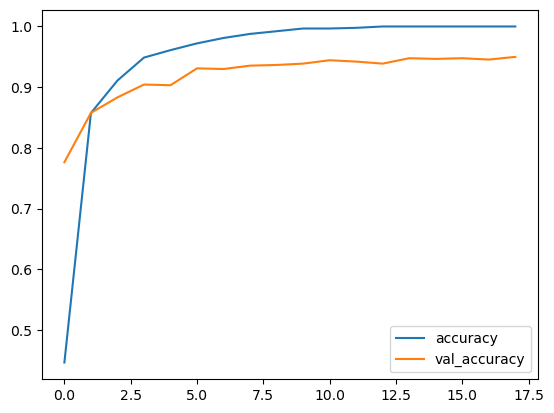

In [16]:
losses = pd.DataFrame(mon_cnn.history.history)
losses[['accuracy', 'val_accuracy']].plot()

<Axes: >

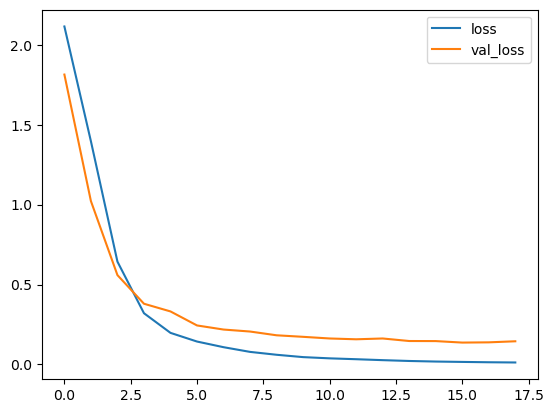

In [17]:
losses[['loss', 'val_loss']].plot()

In [19]:
# Prédire les classes (indices) au lieu des probabilités continues
pred_classes = np.argmax(mon_cnn.predict(X_test), axis=1)

29/29 [==============================] - 0s 2ms/step


29/29 [==============================] - 0s 2ms/step


<Axes: >

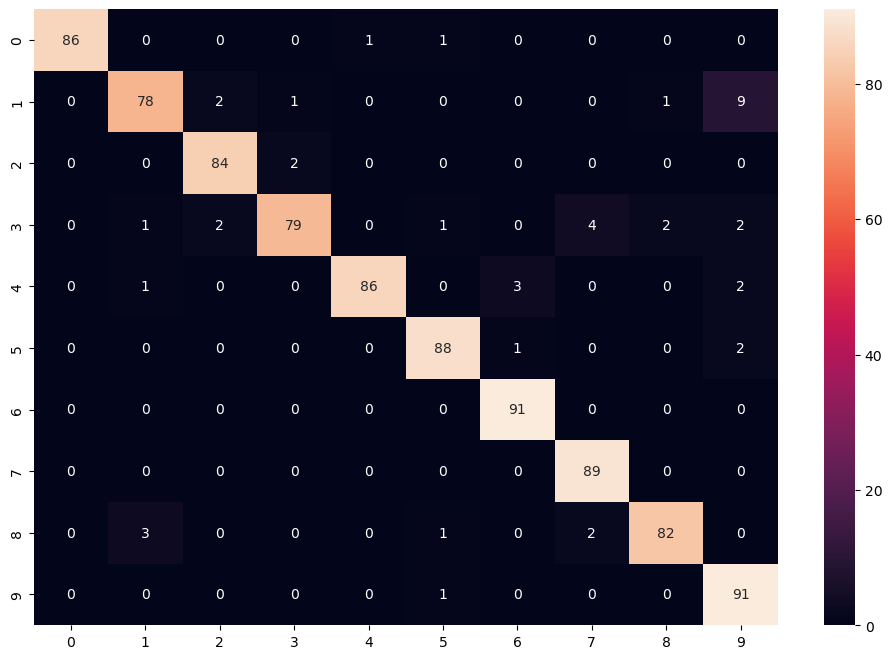

In [20]:
plt.figure(figsize=(12,8))
pred = mon_cnn.predict(X_test)
sns.heatmap(confusion_matrix(y_test, pred_classes),annot=True)

In [21]:
img = X_train[0]
mon_cnn.predict(img.reshape(1,8,8,1))

1/1 [==============================] - 0s 22ms/step


array([[9.9987352e-01, 2.3949121e-06, 1.0247809e-05, 2.5906817e-07,
        1.1828874e-06, 5.3750151e-05, 1.6405680e-05, 1.6022684e-06,
        4.7785843e-06, 3.5797329e-05]], dtype=float32)

In [28]:
np.argmax(mon_cnn.predict(img.reshape(1,8,8,1)), axis=-1)[0]

1/1 [==============================] - 0s 37ms/step


0